<a href="https://colab.research.google.com/github/chin2168/chin2168/blob/main/first%20data%20set%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries and downloading data

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score



# Download Sign Language MNIST dataset
!wget /content/drive/MyDrive/first66/sign_mnist_train/sign_mnist_train.csv
!wget /content/drive/MyDrive/first66/sign_mnist_test/sign_mnist_test.csv

# Read data into DataFrames
train_df = pd.read_csv("/content/drive/MyDrive/first66/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/first66/sign_mnist_test/sign_mnist_test.csv")


# Extract features and labels
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, 1:], train_df["label"], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/content/drive/MyDrive/first66/sign_mnist_train/sign_mnist_train.csv: Scheme missing.
/content/drive/MyDrive/first66/sign_mnist_test/sign_mnist_test.csv: Scheme missing.


Define Feature Extraction Functions

In [2]:
def extract_pca_features(X, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    return pca.transform(X)

def extract_hog_features(X, cell_size=(8, 8), orientations=9):
    hog = cv2.HOGDescriptor(cell_size, orientations)
    features = []
    for image in X:
        features.append(hog.compute(image.reshape(28, 28)))
    return np.array(features)


Implement Classification Algorithms

In [3]:

from sklearn.svm import SVC

from sklearn.mixture import GaussianMixture

from sklearn.neural_network import MLPClassifier

# Define dictionary to store models and their names
models = {

    "SVM": SVC(kernel="linear"),

    "GMM": GaussianMixture(n_components=10),

    "ANN": MLPClassifier(alpha=0.01, hidden_layer_sizes=(128, 64), solver="adam", random_state=42),
}


Accuracy Table:
Feature Extractor | Model Name | Accuracy  
PCA        |SVM        | 0.2032  GMM        | 0.0293  ANN        | 0.2187  


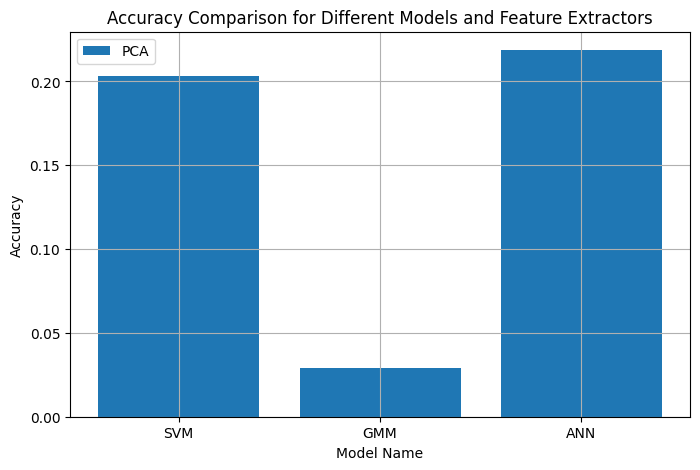

In [4]:
# Define empty dictionary to store results
results = {}

# Loop through feature extraction techniques and classification algorithms
for feature_extractor, extract_fn in zip(["PCA"], [extract_pca_features, extract_hog_features]):
    # Extract features for train and test sets
    X_train_features = extract_fn(X_train, 128)
    X_test_features = extract_fn(X_test, 128)

    # Train and test models for different algorithms
    model_accuracies = {}
    for model_name, model in models.items():
        model.fit(X_train_features, y_train)
        y_pred = model.predict(X_test_features)
        accuracy = accuracy_score(y_test, y_pred)
        model_accuracies[model_name] = accuracy

    # Store results for each feature extractor
    results[feature_extractor] = model_accuracies

# Print accuracy table with header
print("Accuracy Table:")
print(f"{'Feature Extractor':10s} | {'Model Name':10s} | {'Accuracy':10s}")
for feature_extractor, model_accuracies in results.items():
    print(f"{feature_extractor:10s} |", end="")
    for model_name, accuracy in model_accuracies.items():
        print(f"{model_name:10s} | {accuracy:.4f}", end="  ")
    print("")

# Plot accuracy graph
# ...
# Plot accuracy graph
plt.figure(figsize=(8, 5))  # Adjust figure size as needed

for feature_extractor, model_accuracies in results.items():
    model_names = model_accuracies.keys()
    accuracies = model_accuracies.values()

    plt.bar(model_names, accuracies, label=feature_extractor)

plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison for Different Models and Feature Extractors")
plt.legend()
plt.grid(True)
plt.show()

 Evaluate and Compare Models

In [5]:
!pip install scikit-learn
!pip install opencv-python

